In [1]:
import init_notebook
from test_module import test_function

test_function()

I was imported!
Read test data: Hello World!



 Mean squared error is: 
 0.01863790922187293


Text(0, 0.5, 'coordinate 2')

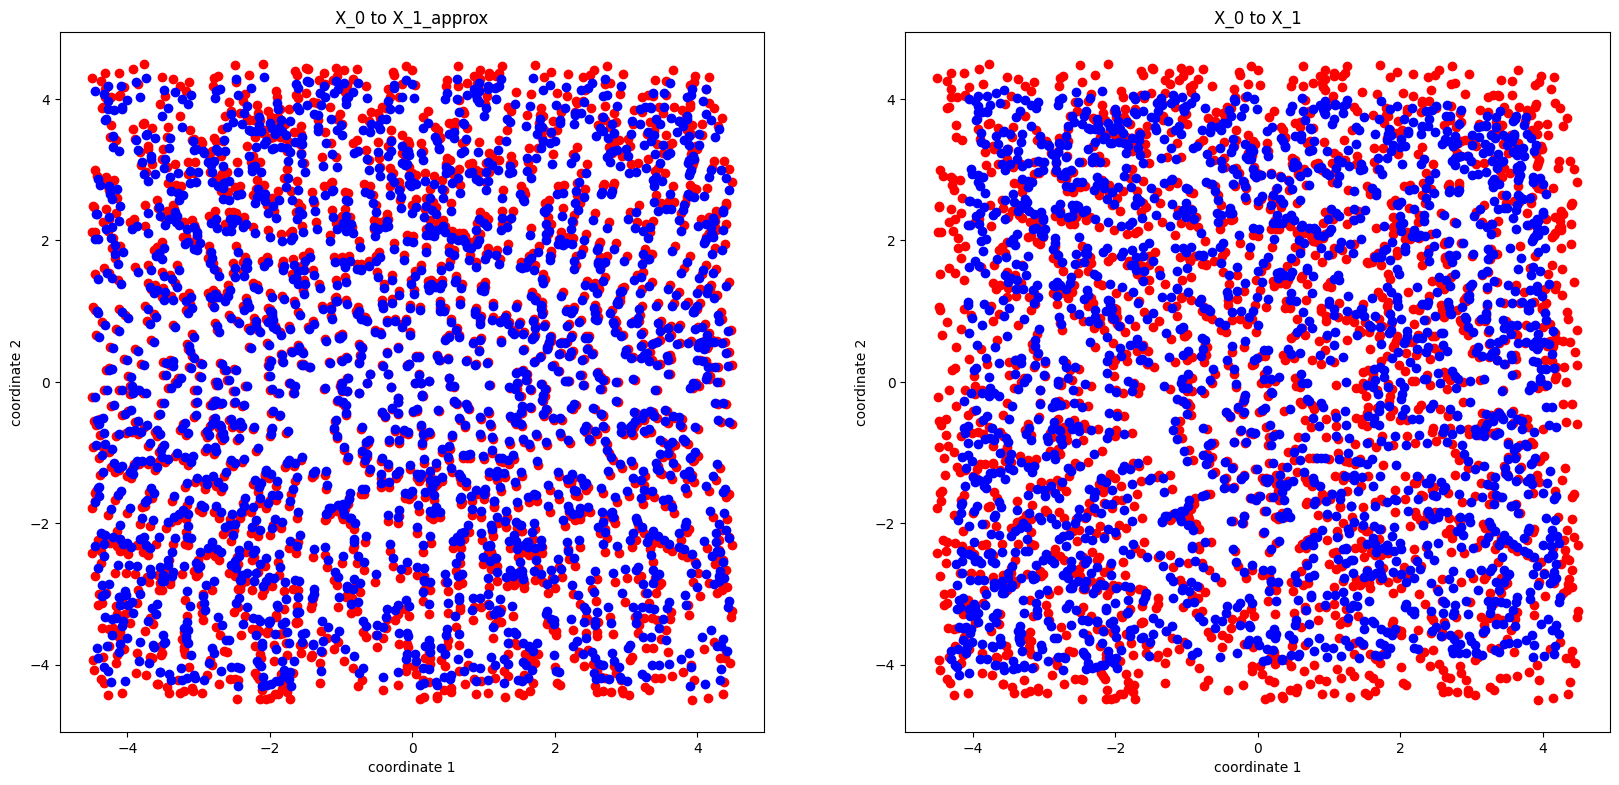

In [4]:
# Part 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



X_0 = np.loadtxt("task_3/nonlinear_vectorfield_data_x0.txt", dtype=float)
X_1 = np.loadtxt("task_3/nonlinear_vectorfield_data_x1.txt", dtype=float)


dt = 0.01


V_x = (X_1 - X_0)/dt

A_hat_transpose = np.linalg.lstsq(X_0, V_x, rcond = None)[0] 
# print("Vector field is: \n", A_hat_transpose)



# Calculating X_1_hat from X_0 by solving an IVP

X_0_flat = X_0.flatten()




# Your function definition using matrix multiplication
def function(t, X):
    result = np.dot(X.reshape(np.shape(X_0)), A_hat_transpose)
    return result

# Using solve_ivp with the flattened initial state
X_1_hat = solve_ivp(function, [0, 0.01], X_0_flat, method='RK45', t_eval=[0.01], dense_output=False, events=None, vectorized=True)

X_1_approx = X_1_hat.y.reshape(np.shape(X_1))



# Computing mean square error between X_1_approx and X_1

mean_squared_error = np.square(np.subtract(X_1_approx, X_1)).mean()
print("\n Mean squared error is: \n", mean_squared_error)


plt.rcParams["figure.figsize"] = (20,20) 

plt.subplot(2,2,2)
plt.scatter(X_0[:,0], X_0[:,1], color='red')
plt.scatter(X_1[:,0], X_1[:,1], color = 'blue')
plt.title('X_0 to X_1')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')

plt.subplot(2,2,1)
plt.scatter(X_0[:,0], X_0[:,1], color='red')
plt.scatter(X_1_approx[:,0], X_1_approx[:,1], color = 'blue')
plt.title('X_0 to X_1_approx')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')

In [5]:
# Part 2

random_indices = np.random.choice(X_0.shape[0], 475, replace=False)

X_l = X_0[random_indices,:]

phi_X0_list = []
phi_X1_list = []
eps = 10
dt = 0.01

for i in range (len(X_0)):
    for j in range (len(X_l)):     
        phi_X0_list.append(np.exp(-pow(np.linalg.norm(X_l[j] - X_0[i]),2)/(eps**2)))
        phi_X1_list.append(np.exp(-pow(np.linalg.norm(X_l[j] - X_1[i]),2)/(eps**2)))

phi_X0_array = np.array(phi_X0_list)
phi_X1_array = np.array(phi_X1_list)

phi_X0 = phi_X0_array.reshape(2000,475) #phi_X0 matrix - 2000*475
phi_X1 = phi_X1_array.reshape(2000,475) #phi_X1 matrix




phi_V_x = (X_1 - X_0)/dt #shape = 2000*2

C_hat_transpose = np.linalg.lstsq(phi_X0, phi_V_x, rcond = None)[0] #Shape = 475*2



# Calculating phi_X1_hat from phi_X0 by solving an IVP

phi_X0_flat = phi_X0.flatten() #shape = (2000*475,1 )






# Your function definition using matrix multiplication

def function(t, phi_X):

    phi_X = phi_X.reshape(2000,-1)
    
    result = np.dot(phi_X, C_hat_transpose) 
    
    return result.flatten()

# Using solve_ivp with the flattened initial statephi_
X1_hat = solve_ivp(function, [0, 0.01], phi_X0_flat , method='RK45', t_eval=[0.01], dense_output=False, events=None, vectorized=True)

X1_approx = X1_hat.y.reshape(np.shape(X_1))



# Computing mean square error between X_1_approx and X_1

phi_mean_squared_error = np.square(np.subtract(X1_approx, X1)).mean()
print("\n Mean squared error for size",size, "is:", phi_mean_squared_error)

ValueError: shapes (2000,2) and (475,2) not aligned: 2 (dim 1) != 475 (dim 0)